In [8]:
import numpy as np
from scipy.optimize import minimize
from scipy.stats import rv_continuous

# BXDa Distribution
class BXDa(rv_continuous):
    def __init__(self, beta, theta, delta, lam, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.beta = beta
        self.theta = theta
        self.delta = delta
        self.lam = lam

    # Dagum CDF
    def dagum_cdf(self, x):
        return (1 + (x / self.lam) ** (-self.delta)) ** (-self.beta)

    # BXDa CDF
    def _cdf(self, x):
        Fd = self.dagum_cdf(x)
        return (1 - np.exp(-(Fd / (1 - Fd)) ** self.theta)) ** (1 / self.theta)

    # BXDa PDF
    def _pdf(self, x):
        Fd = self.dagum_cdf(x)
        dFd = (self.beta * self.delta / self.lam) * (x / self.lam) ** (-self.delta - 1) * (1 + (x / self.lam) ** (-self.delta)) ** (-self.beta - 1)
        num = (Fd / (1 - Fd)) ** (self.theta - 1) * dFd / (1 - Fd) ** 2
        g = np.exp(-(Fd / (1 - Fd)) ** self.theta) * num
        return (1 / self.theta) * (1 - np.exp(-(Fd / (1 - Fd)) ** self.theta)) ** (1 / self.theta - 1) * g * self.theta

# Example: Create BXDa object with parameters
bxda = BXDa(beta=2, theta=1.5, delta=1.2, lam=1)

# Generate PDF and CDF values
x = np.linspace(0.1, 5, 100)
pdf_vals = bxda.pdf(x)
cdf_vals = bxda.cdf(x)


Fitted parameters: [4.10333411 4.50474446 0.69754898 0.13664144]


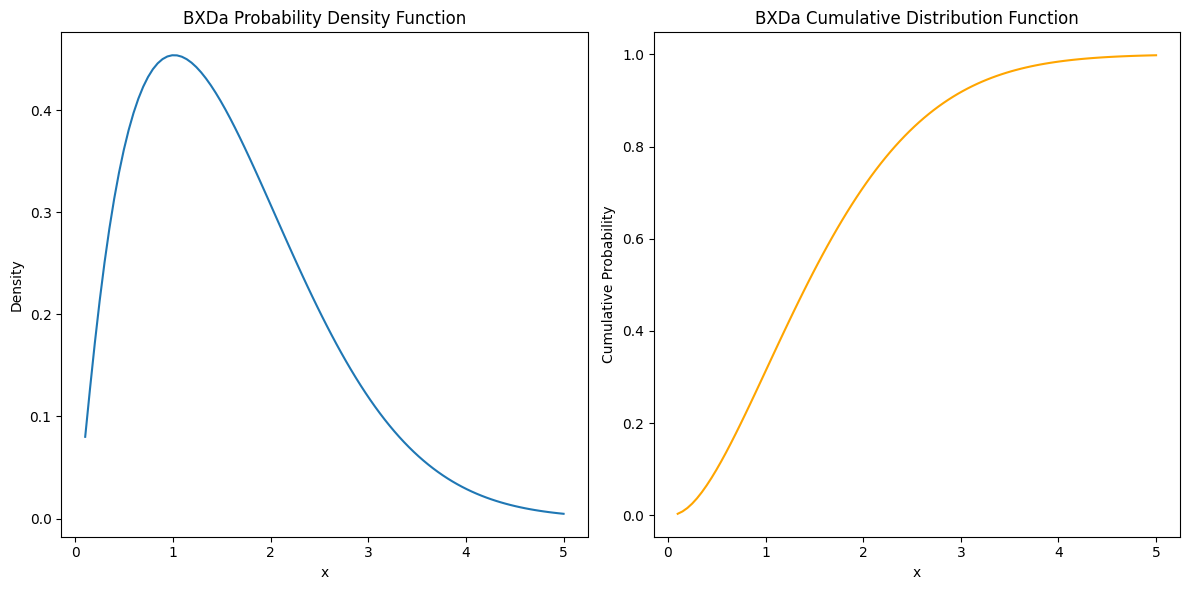

In [9]:
def neg_log_likelihood(params, data):
    beta, theta, delta, lam = params
    if beta <= 0 or theta <= 0 or delta <= 0 or lam <= 0:
        return np.inf
    model = BXDa(beta, theta, delta, lam)
    pdf_vals = model.pdf(data)
    return -np.sum(np.log(pdf_vals + 1e-12))  # avoid log(0)

# Example dataset (replace with real data)
data = np.random.weibull(1.5, 100)  

# Initial guess
init_params = [1, 1, 1, 1]

result = minimize(neg_log_likelihood, init_params, args=(data,), method="Nelder-Mead")
print("Fitted parameters:", result.x)

#visualize
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x, pdf_vals, label='BXDa PDF')
plt.title('BXDa Probability Density Function')
plt.xlabel('x')
plt.ylabel('Density')


plt.subplot(1, 2, 2)
plt.plot(x, cdf_vals, label='BXDa CDF', color='orange')
plt.title('BXDa Cumulative Distribution Function')
plt.xlabel('x')
plt.ylabel('Cumulative Probability')
plt.tight_layout()
plt.show()
